In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
# loading dataset
train_data = np.loadtxt('features_train.txt')
test_data = np.loadtxt('features_test.txt')

# Splitting data into train and test samples
X_train = train_data[:, 1:]
y_train = np.ravel(train_data[:, 0]).astype(int)
X_test = test_data[:, 1:]
y_test = np.ravel(test_data[:, 0]).astype(int)

In [3]:
# Creating an SVM model with polynomial kernel
svm = SVC(C=0.01, degree=2, kernel='poly', gamma=1.0)

In [4]:
def one_vs_rest(y_train, y_test, class_):
    """
    it takes y_train, y_test and class_ as parameter to
    convert targets into binary labels.
    1 for specified class and 0 for others.
    
    Returns: tuple of converted targets
    """
    new_y_train = [1 if j == class_ else 0 for j in y_train]
    new_y_test = [1 if j == class_ else 0 for j in y_test]

    return new_y_train, new_y_test

### Q2

In [5]:
results = {}
for i in [0, 2, 4, 6, 8]:
    new_targets = one_vs_rest(y_train, y_test, i)
    model = svm.fit(X_train, new_targets[0])
    y_pred = svm.predict(X_train)
    results[i] = np.mean(new_targets[0] != y_pred)
    

In [6]:
results

{0: 0.11905088465231106,
 2: 0.10026059525442327,
 4: 0.08942531888629818,
 6: 0.09107118365107666,
 8: 0.07433822520916199}

### Q3

In [7]:
results = {}
for i in [1, 3, 5, 7, 9]:
    new_targets = one_vs_rest(y_train, y_test, i)
    model = svm.fit(X_train, new_targets[0])
    y_pred = svm.predict(X_train)
    results[i] = np.mean(new_targets[0] != y_pred)

In [8]:
results

{1: 0.014264161294746948,
 3: 0.09024825126868742,
 5: 0.07625840076807022,
 7: 0.08846523110684405,
 9: 0.08832807570977919}

### Q4

In [9]:
zero_vs_all = one_vs_rest(y_train, y_test, 0)
model = svm.fit(X_train, zero_vs_all[0])
zero_support = len(model.support_) # number of support vector

one_vs_all = one_vs_rest(y_train, y_test, 1)
model = svm.fit(X_train, one_vs_all[0])
one_support = len(model.support_)

print(abs(zero_support - one_support))


1879


### Q5

In [10]:
train_indices = (train_data[:, 0] == 1) | (train_data[:, 0] == 5)
test_indices = (test_data[:, 0] == 1) | (test_data[:, 0] == 5)

one_vs_five_X_train = X_train[train_indices]
one_vs_five_X_test = X_test[test_indices]

one_vs_five_y_train = y_train[train_indices]
one_vs_five_y_test = y_test[test_indices]

In [11]:
n_of_support, E_ins, E_outs = [], [], []
C_values = [0.001, 0.01, 0.1, 1]

for c_ in C_values:
    svm.C = c_ # update C
    model = svm.fit(one_vs_five_X_train, one_vs_five_y_train)
    y_train_pred = model.predict(one_vs_five_X_train)
    e_in = np.mean(one_vs_five_y_train != y_train_pred)
    y_test_pred = model.predict(one_vs_five_X_test)
    e_out = np.mean(one_vs_five_y_test != y_test_pred)

    n_of_support.append(len(model.support_)) # n of support vectors
    E_ins.append(e_in)
    E_outs.append(e_out)

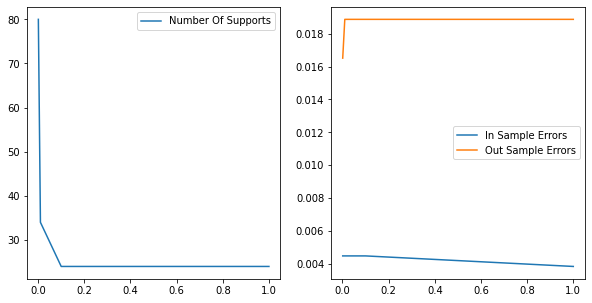

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(C_values, np.array(n_of_support), label='Number Of Supports')
ax[0].legend()

ax[1].plot(C_values, E_ins, label='In Sample Errors')
ax[1].plot(C_values, E_outs, label='Out Sample Errors')
ax[1].legend()

# plt.savefig('figure_for_question5.png', dpi=300, bbox_inches='tight')

In [13]:
print("C Values:", C_values)
print("In Sample Errors:", E_ins)
print("Out Sample Errors", E_outs)
print("Num. Of Sup. Vec.:", n_of_support)

# The answer is D which is Maximum C achieves the lowest Ein

C Values: [0.001, 0.01, 0.1, 1]
In Sample Errors: [0.004484304932735426, 0.004484304932735426, 0.004484304932735426, 0.003843689942344651]
Out Sample Errors [0.01650943396226415, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886]
Num. Of Sup. Vec.: [80, 34, 24, 24]


### Q6

In [14]:
svm = SVC(C=0.01, degree=5, kernel='poly', gamma=1.0)

n_of_support, E_ins, E_outs = [], [], []
C_values = [0.001, 0.01, 0.1, 1]

for c_ in C_values:
    svm.C = c_
    model = svm.fit(one_vs_five_X_train, one_vs_five_y_train)
    y_train_pred = model.predict(one_vs_five_X_train)
    e_in = np.mean(one_vs_five_y_train != y_train_pred)
    y_test_pred = model.predict(one_vs_five_X_test)
    e_out = np.mean(one_vs_five_y_test != y_test_pred)

    n_of_support.append(len(model.support_))
    E_ins.append(e_in)
    E_outs.append(e_out)

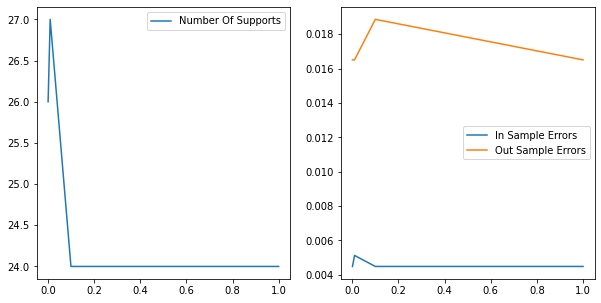

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(C_values, np.array(n_of_support), label='Number Of Supports')
ax[0].legend()

ax[1].plot(C_values, E_ins, label='In Sample Errors')
ax[1].plot(C_values, E_outs, label='Out Sample Errors')
ax[1].legend()

# plt.savefig('figure_for_question6.png', dpi=300, bbox_inches='tight')

In [16]:
print("C Values:", C_values)
print("In Sample Errors:", E_ins)
print("Out Sample Errors", E_outs)
print("Num. Of Sup. Vec.:", n_of_support)

# The answer is B which is When C = 0.001, the number of support vectors is lower at Q = 5

C Values: [0.001, 0.01, 0.1, 1]
In Sample Errors: [0.004484304932735426, 0.005124919923126201, 0.004484304932735426, 0.004484304932735426]
Out Sample Errors [0.01650943396226415, 0.01650943396226415, 0.018867924528301886, 0.01650943396226415]
Num. Of Sup. Vec.: [26, 27, 24, 24]


### Q7

In [39]:
scores = {}
for j in range(100):
    shuffled_idx = np.arange(one_vs_five_X_train.shape[0])
    np.random.shuffle(shuffled_idx)
    for i in [0.0001, 0.001, 0.01, 0.1, 1]:
        scores.setdefault(i, [])
        model = SVC(C=i, kernel='poly', degree=2, gamma=1.0)
        scores[i].extend(1 - cross_val_score(
            model,
            one_vs_five_X_train[shuffled_idx],
            one_vs_five_y_train[shuffled_idx],
            cv=10, n_jobs=-1))

In [40]:
scores_array = np.array([scores[i] for i in [0.0001, 0.001, 0.01, 0.1, 1]])

In [41]:
scores_array.shape

(5, 1000)

In [42]:
Counter(np.argmin(scores_array, axis=0))
# 1 which is 0.001 is selected more often

Counter({0: 328, 1: 524, 2: 81, 4: 46, 3: 21})

### Q8

In [75]:
np.mean(scores_array, axis=1) # the answer is C

array([0.01081288, 0.00499669, 0.00457333, 0.00472142, 0.00497089])

### Q9

In [81]:
e_in, e_out = [], []
C_values = [0.01, 1, 100, 1e4, 1e6]
for i in C_values:
    model = SVC(C=i, kernel='rbf', gamma=1.0)
    model.fit(one_vs_five_X_train, one_vs_five_y_train)
    e_in.append(np.mean(model.predict(one_vs_five_X_train) != one_vs_five_y_train))
    e_out.append(np.mean(model.predict(one_vs_five_X_test) != one_vs_five_y_test))

In [83]:
print('E in:',C_values[np.argmin(e_in)])

E in: 1000000.0


### Q10

In [84]:
print('E out:',C_values[np.argmin(e_out)])

E out: 100
